In [7]:
import pandas as pd
df = pd.read_csv("Healthcare Workforce Mental Health Dataset.csv")
df.head()

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,HCP-00001,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,No
1,HCP-00002,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,No
2,HCP-00003,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,Yes
3,HCP-00004,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,No
4,HCP-00005,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,No


In [8]:

df = df.drop(columns=['Employee ID'])

print(df.isnull().sum())

for col in df.columns:
    print(f"{col}: {df[col].unique()}")


Employee Type             0
Department                0
Workplace Factor          0
Stress Level              0
Burnout Frequency         0
Job Satisfaction          0
Access to EAPs            0
Mental Health Absences    0
Turnover Intention        0
dtype: int64
Employee Type: ['Pediatric Nurse' 'Laboratory Technician' 'Nursing Assistant'
 'Medical Assistant' 'Registered Nurse' 'Radiology Technician'
 'Healthcare Administrator' 'Critical Care Nurse' 'Physician (Specialist)'
 'Physician (General)']
Department: ['Pediatrics' 'Laboratory' 'Assisted Living' 'Outpatient Services'
 'General Medicine' 'Radiology' 'Administration' 'ICU' 'Specialty Care'
 'General Practice']
Workplace Factor: ['Heavy Workload' 'Safety Concerns' 'Poor Work Environment'
 'Work-Life Imbalance' 'Career Stagnation' 'Emotional Demands'
 'Unclear Job Expectations' 'Job Insecurity']
Stress Level: [8 6 7 9 5 4]
Burnout Frequency: ['Often' 'Occasionally' 'Never']
Job Satisfaction: [2 1 4 3 5]
Access to EAPs: ['Yes' 'No

In [9]:
from sklearn.preprocessing import LabelEncoder


df_encoded = df.copy()


le = LabelEncoder()
df_encoded['Burnout Frequency'] = le.fit_transform(df_encoded['Burnout Frequency'])


categorical_cols = ['Employee Type', 'Department', 'Workplace Factor', 'Access to EAPs', 'Turnover Intention']
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)


df_encoded.head()


,Stress Level,Burnout Frequency,Job Satisfaction,Mental Health Absences,Employee Type_Healthcare Administrator,Employee Type_Laboratory Technician,Employee Type_Medical Assistant,Employee Type_Nursing Assistant,Employee Type_Pediatric Nurse,Employee Type_Physician (General),...,Department_Specialty Care,Workplace Factor_Emotional Demands,Workplace Factor_Heavy Workload,Workplace Factor_Job Insecurity,Workplace Factor_Poor Work Environment,Workplace Factor_Safety Concerns,Workplace Factor_Unclear Job Expectations,Workplace Factor_Work-Life Imbalance,Access to EAPs_Yes,Turnover Intention_Yes
0,8,2,2,6,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
1,8,2,1,12,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,6,1,2,9,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,True
3,7,0,4,11,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,8,1,2,7,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


X = df_encoded.drop('Burnout Frequency', axis=1)
y = df_encoded['Burnout Frequency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.25      0.30       168
           1       0.47      0.45      0.46       384
           2       0.58      0.67      0.62       448

    accuracy                           0.52      1000
   macro avg       0.48      0.46      0.46      1000
weighted avg       0.50      0.52      0.51      1000

Confusion Matrix:
 [[ 42  74  52]
 [ 43 174 167]
 [ 26 121 301]]


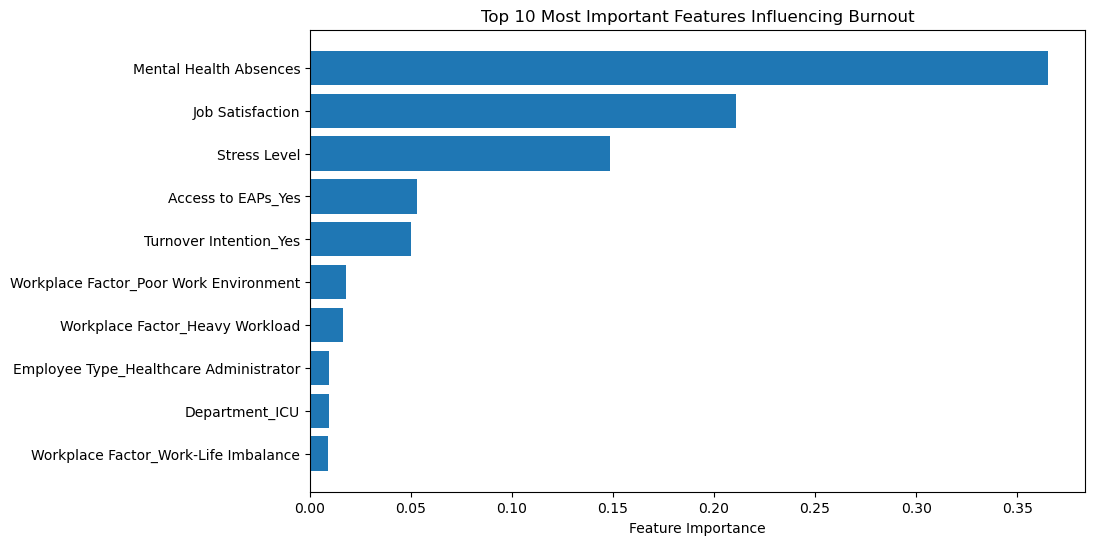

In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Top 10 Most Important Features Influencing Burnout")
plt.barh(range(10), importances[indices[:10]][::-1])
plt.yticks(range(10), [features[i] for i in indices[:10]][::-1])
plt.xlabel("Feature Importance")
plt.show()


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


y_pred_best = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report (Tuned Model):\n", classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Classification Report (Tuned Model):
               precision    recall  f1-score   support

           0       0.42      0.41      0.41       168
           1       0.53      0.36      0.43       384
           2       0.62      0.78      0.69       448

    accuracy                           0.56      1000
   macro avg       0.52      0.52      0.51      1000
weighted avg       0.55      0.56      0.54      1000



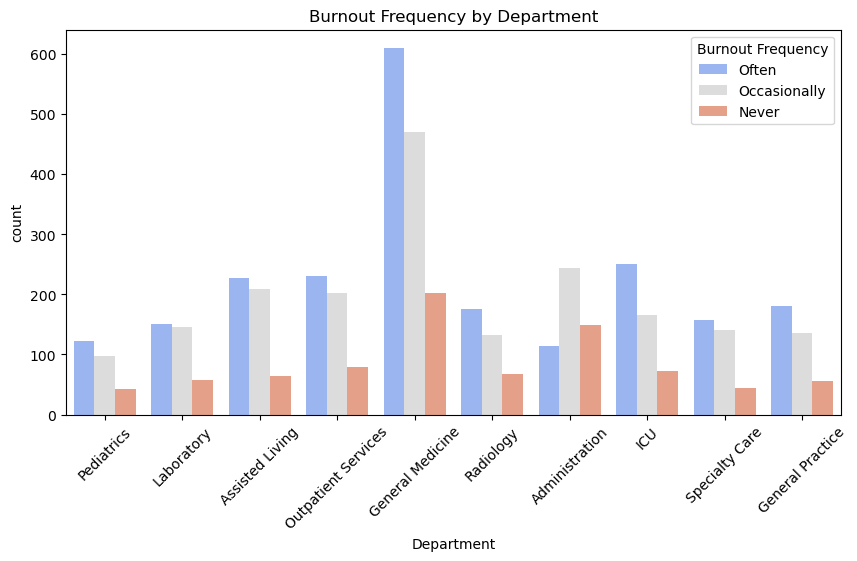

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Department', hue='Burnout Frequency', palette='coolwarm')
plt.title("Burnout Frequency by Department")
plt.xticks(rotation=45)
plt.show()


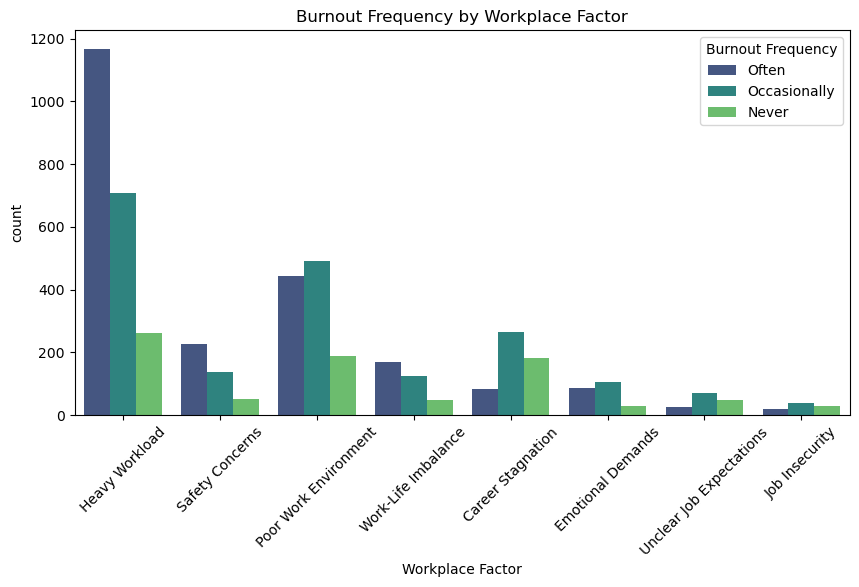

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Workplace Factor', hue='Burnout Frequency', palette='viridis')
plt.title("Burnout Frequency by Workplace Factor")
plt.xticks(rotation=45)
plt.show()


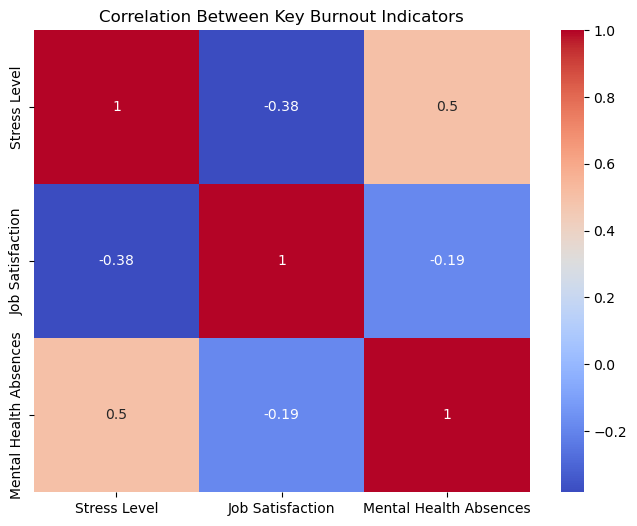

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Stress Level','Job Satisfaction','Mental Health Absences']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Key Burnout Indicators")
plt.show()


C:\Users\dhaiv\AppData\Local\Temp\ipykernel_26772\3484448597.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Department', y='Stress Level', palette='mako')


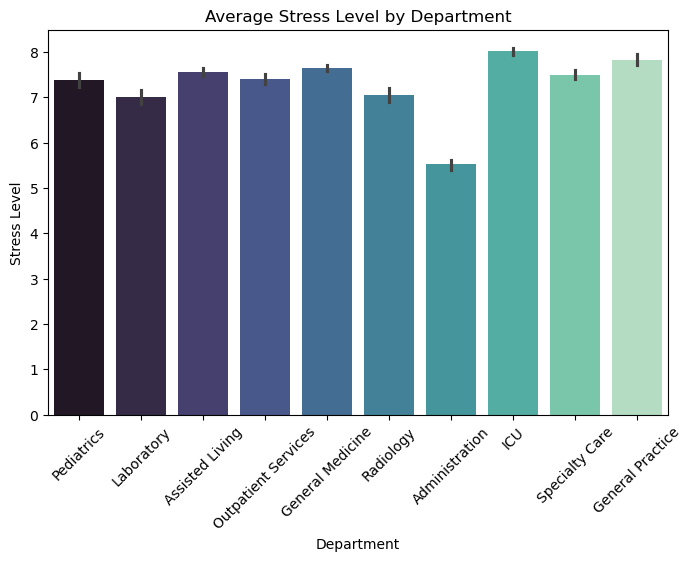

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Department', y='Stress Level', palette='mako')
plt.title("Average Stress Level by Department")
plt.xticks(rotation=45)
plt.show()
